# Data loading

In [44]:
import pandas as pd

data = pd.read_csv('krkopt.data', sep=",", header=None)
data.columns = ["white_king_column", "white_king_row", "white_rook_column", "white_rook_row", 
                "black_king_file", "black_king_file", "label"]

data

white_king_column  white_king_row white_rook_column  white_rook_row  \
0                     a               1                 b               3   
1                     a               1                 c               1   
2                     a               1                 c               1   
3                     a               1                 c               1   
4                     a               1                 c               2   
...                 ...             ...               ...             ...   
28051                 b               1                 g               7   
28052                 b               1                 g               7   
28053                 b               1                 g               7   
28054                 b               1                 g               7   
28055                 b               1                 g               7   

       black_king_file  black_king_file    label  
0                    c                2     draw  
1                    c                2     draw  
2                    d                1     draw  
3                    d                2     draw  
4                    c                1     draw  
...                ...              ...      ...  
28051                e                5  sixteen  
28052                e                6  sixteen  
28053                e                7  sixteen  
28054                f                5  sixteen  
28055                g                5  sixteen  

[28056 rows x 7 columns]

# Data analizing

* Data consists of coordinates of white king, white rook and black king.
* Label defines how many moves white needs to checkmate black (assuming both playeres do optimal moves)
* All positions are defined so that black is first to move
* There is totally 18 classes:
    * draw - situation where black king has no legal moves, but it is not attacked, or situation where black king can eat white rook
    * chackmate - labelled as 'zero'. Situation where black king has no legal moves while beeing in check
    * chakmate in 1-16 moves - white needs N moves to checkmate black (assuming optimal play)

# Examples

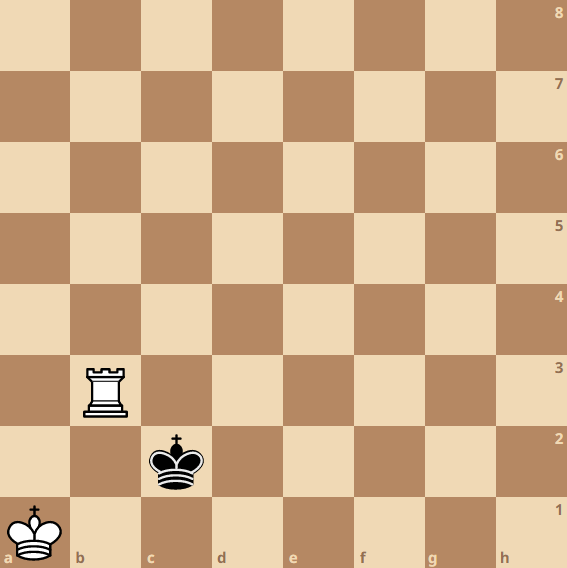
<center/><i/>Image 1: Example of a draw<i><center>


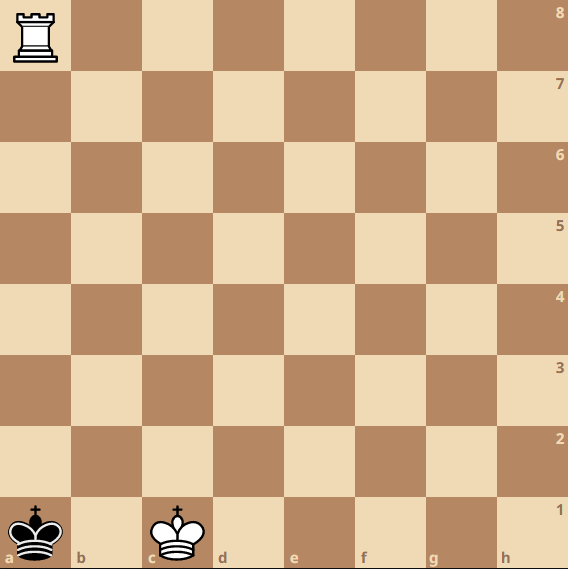
<center/><i/>Image 2: Example of checkmate<i><center>

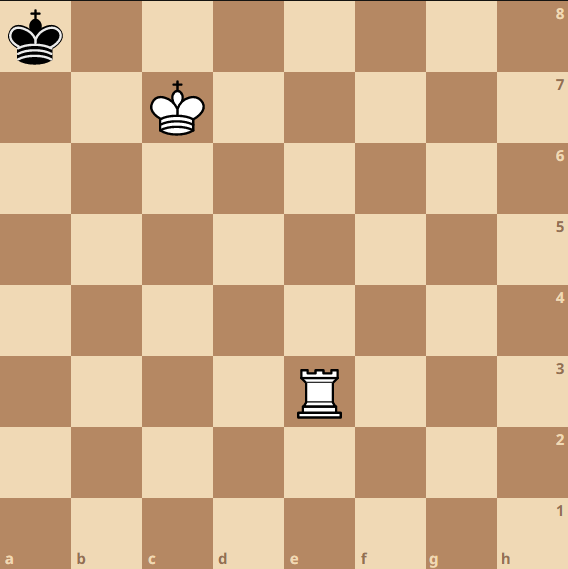
<center/><i/>Image 3: Checkmate in 1<i><center>

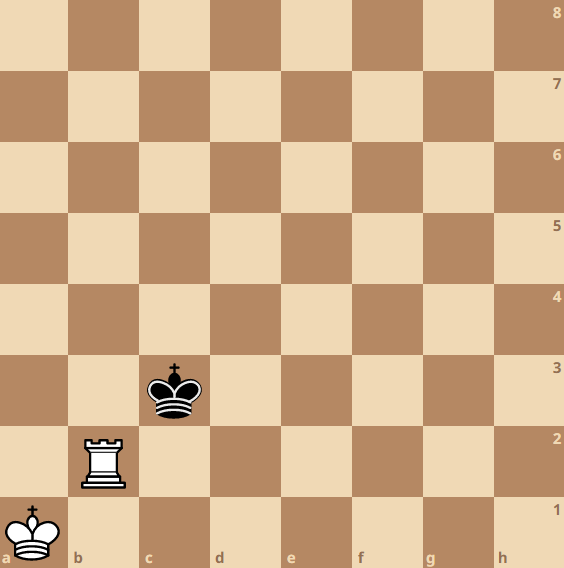
<center/><i/>Image 4: Worst position for white - mate in 16.<i><center>
<br/>


Correct evaluation for some of these positions (checkmate in 10+ moves) is not simple to determine, because of very large number of possible combinations positions and moves in each position. 

# Data preprocessing

In [45]:
# changin all coordinats to numerical representation (eg. a1 will become (1, 1))
mapping_coordinates = {'a': 1, 'b': 2, 'c' : 3, 'd':4, 'e' : 5, 'f' : 6, 'g' : 7, 'h' : 8} 

data.replace(mapping_coordinates, inplace=True)

mapping_labels = {'draw' : -1, 'zero' : 0, 'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4,
                 'five' : 5, 'six' : 6, 'seven' : 7, 'eight' : 8, 'nine' : 9,
                 'ten' : 10, 'eleven' : 11, 'twelve' : 12, 'thirteen' : 13,
                 'fourteen' : 14, 'fifteen' : 15, 'sixteen' : 16}
data.replace(mapping_labels, inplace=True)



# Package imports and spliting dataset on train and test sets

In [4]:
# importing necessary libraries for construction, training, validation and grafical representation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [46]:
X = data.loc[:, data.columns != "label"].values
y = data["label"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Classification
##### For classification will be used 4 algorithms, and their comparison will be made:
* Logistic regression
* KNN
* Suport vector machines
* Naive bayes

### Logistic regression

In [6]:
model_log_reg = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg')
model_log_reg.fit(X_train, y_train)
predictions = model_log_reg.predict(X_test)

C:\Users\gavra\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


The issue with this classification task is many classes - 18. Some algorithms have trouble with fitting (they diverge), like logstic regression.

### Naive Bayes

In [47]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

predictions = model_nb.predict(X_test)

Advantage of this algorithm is that it can always fit and fitting proces is very fast, because it just counts number of samples per class, and calculates probability for features with simple bayes formula.

<AxesSubplot:>

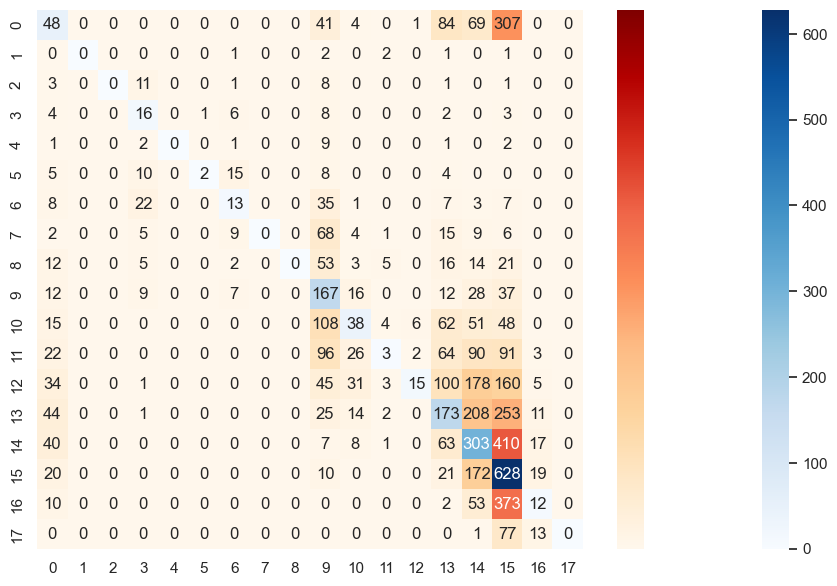

In [55]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')


In [56]:
metrics.accuracy_score(y_test, predictions)

0.2526728439059159

Accuracy of model is 24%. However, from confusion matrix we can say that performance of model is not that bad, with exception of class 0 (draw), that is special and model totally missed evaluation. For example, for 148 samples that are mate in 8, algorithm predicted that there is mate in 9 on the board, which is very close evaluation.

### Suport vector machines

In [57]:
# svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
predictions = model_svm.predict(X_test)


<AxesSubplot:>

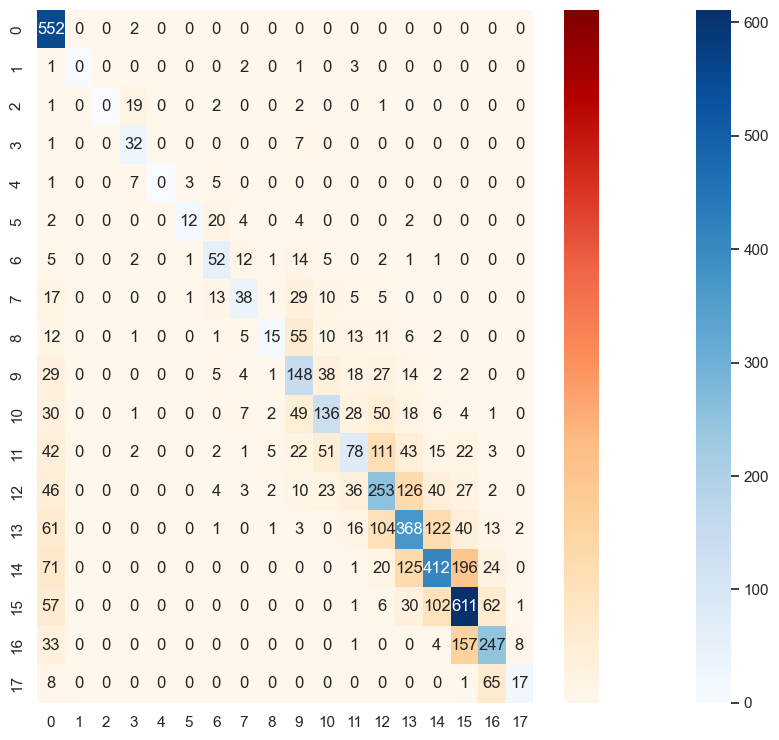

In [61]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')

In [62]:
metrics.accuracy_score(y_test, predictions)

0.5294012829650748

Suport vector machines give much better results. Main difference is that draw class is correctly classified, even without single mistake!
<br/>
In other words, no position that is not draw, is not classified as draw, whereas some draw positions are classified as other classes.<br/>
<br/>
Accuracy of 53% is very good. The same applies as for the previus algorithm, meaning that mostly of missed samples are very close to the correct class.
<br/>
Model is more demanding for fitting than KNN or Naive Bayes, but it can fit (unlike logistic regression).

### KNN

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

<AxesSubplot:>

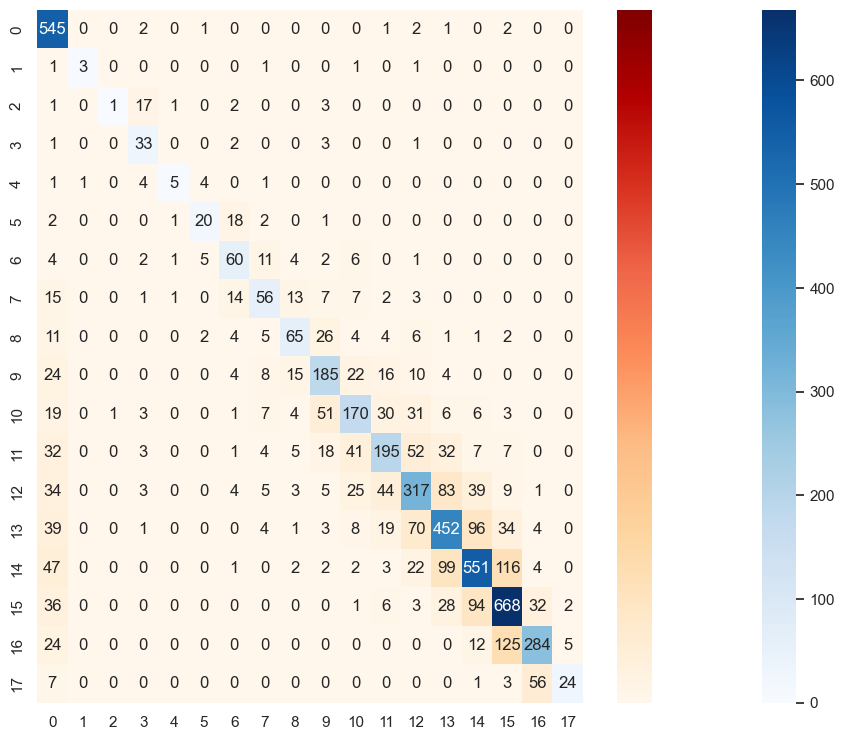

In [64]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')

In [65]:
metrics.accuracy_score(y_test, predictions)

0.6475409836065574

KNN algoritham is the best for this classification problem, with accuracy 66,3%. Also, all said for small errors can be applied here as well.

Since KNN is clearly best algorithm, optimisation of hyperparameters will be done, so that the best combination form final model.
Parameters for optimisations ar:
* Number of nearest neighbours
* Vote system
* Measurement of distance
<br/><br/> As optimization criteria accuracy is used.
<br/> Note: only odd number of neighbours will be used, because one of vote systems will be uniform voting (all votes are of equal importance)

In [66]:
n_neighbors = range(1, 41, 2)
weights = ['uniform', 'distance']
knn_metrics = ['euclidean', 'manhattan', 'minkowski']

# struktura u koju ce se cuvati tacnost modela za odredjenu kombinaciju parametara
df = pd.DataFrame(columns=['Num of neighbours', 'Weight', 'Distance', 'Accuracy'])
inx = 0

for neighbors in n_neighbors:
    for weight in weights:
        for knn_metric in knn_metrics:
            knn_model = KNeighborsClassifier(n_neighbors=neighbors, weights = weight, metric = knn_metric)
            knn_model.fit(X_train, y_train)
            predictions = knn_model.predict(X_test)
            acc = metrics.accuracy_score(y_test, predictions)
            print(f"Num of neighbors: {neighbors}, weight: {weight}, metric: {knn_metric}. Accuracy is {acc}")
            df.loc[inx] = [neighbors, weight, knn_metric, acc]
            inx = inx + 1

Num of neighbors: 1, weight: uniform, metric: euclidean. Accuracy is 0.5046329294369208
Num of neighbors: 1, weight: uniform, metric: manhattan. Accuracy is 0.5046329294369208
Num of neighbors: 1, weight: uniform, metric: minkowski. Accuracy is 0.5046329294369208
Num of neighbors: 1, weight: distance, metric: euclidean. Accuracy is 0.5046329294369208
Num of neighbors: 1, weight: distance, metric: manhattan. Accuracy is 0.5046329294369208
Num of neighbors: 1, weight: distance, metric: minkowski. Accuracy is 0.5046329294369208
Num of neighbors: 3, weight: uniform, metric: euclidean. Accuracy is 0.5887384176764077
Num of neighbors: 3, weight: uniform, metric: manhattan. Accuracy is 0.5887384176764077
Num of neighbors: 3, weight: uniform, metric: minkowski. Accuracy is 0.5887384176764077
Num of neighbors: 3, weight: distance, metric: euclidean. Accuracy is 0.5890947968638631
Num of neighbors: 3, weight: distance, metric: manhattan. Accuracy is 0.5890947968638631
Num of neighbors: 3, weight

Num of neighbors: 31, weight: distance, metric: euclidean. Accuracy is 0.6585887384176764
Num of neighbors: 31, weight: distance, metric: manhattan. Accuracy is 0.7241625089094796
Num of neighbors: 31, weight: distance, metric: minkowski. Accuracy is 0.6585887384176764
Num of neighbors: 33, weight: uniform, metric: euclidean. Accuracy is 0.6174269422665716
Num of neighbors: 33, weight: uniform, metric: manhattan. Accuracy is 0.6632216678545972
Num of neighbors: 33, weight: uniform, metric: minkowski. Accuracy is 0.6174269422665716
Num of neighbors: 33, weight: distance, metric: euclidean. Accuracy is 0.6478973627940128
Num of neighbors: 33, weight: distance, metric: manhattan. Accuracy is 0.7211332858161084
Num of neighbors: 33, weight: distance, metric: minkowski. Accuracy is 0.6478973627940128
Num of neighbors: 35, weight: uniform, metric: euclidean. Accuracy is 0.6070919458303635
Num of neighbors: 35, weight: uniform, metric: manhattan. Accuracy is 0.6548467569493942
Num of neighbor

In [67]:
optimum_params = df[df['Accuracy'] == df['Accuracy'].max()]
optimum_params

Num of neighbours    Weight   Distance  Accuracy
28                  9  distance  manhattan  0.789558

For optimal combination of parameters predictions on test set will be made as well as plotting confusion matrix, so that all results could be grafically analized.

<AxesSubplot:>

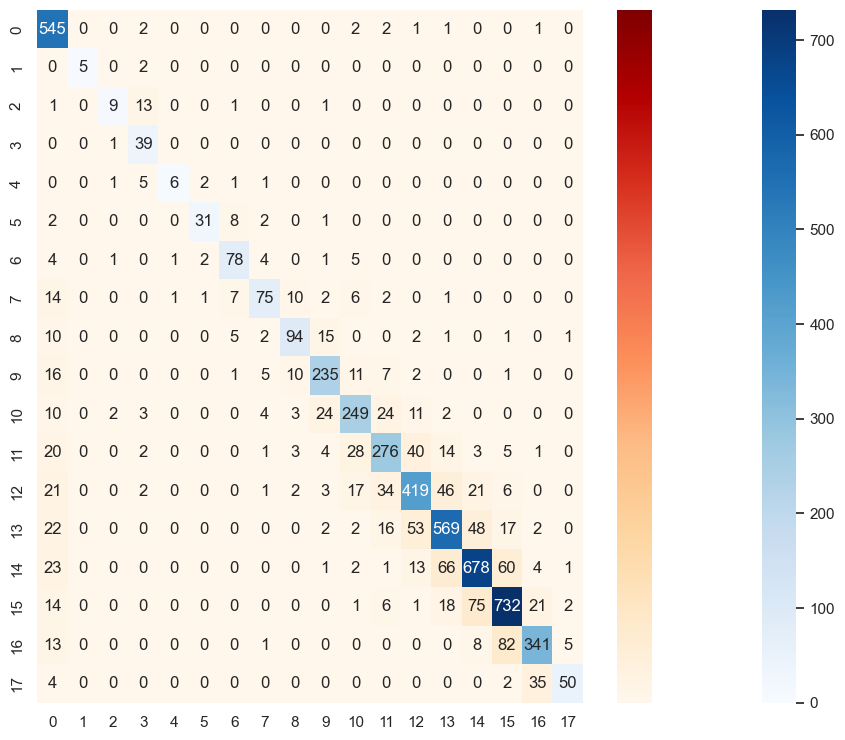

In [68]:
opt_n_of_neighbours = optimum_params['Num of neighbours'].item()
opt_weight = optimum_params['Weight'].item()
opt_distance = optimum_params['Distance'].item()

knn_model = KNeighborsClassifier(n_neighbors=opt_n_of_neighbours, weights=opt_weight, metric=opt_distance)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')

Finall accuracy is 79.5%.

### Adjusted accuracy
New metric will be introduced, so that neighbour class from true class are not classified as miss, but as a correct prediction. (eg. if model predicts mate in 13 and correct evaluation is mate in 14, that will count as correct prediction).

In [69]:
def adjusted_accuracy(y_test, preds):
    correct_count = 0
    for i in range(len(predictions)):
        # za prve tri klase (remi, sahmat, i mat u 1 mora da bude tacno klasifikovano)
        # za ostale ce se uvesti tolerancija promasenog jednog poteza
        if(preds[i] == 0 and y_test[i] == 0):
            correct_count = correct_count + 1
        elif(preds[i] == 1 and y_test[i] == 1):
            correct_count = correct_count + 1
        elif(preds[i] == 2 and y_test[i] == 2):
            correct_count = correct_count + 1
        elif((preds[i] == 17 and y_test[i] == 17) or (preds[i] == 16 and y_test[i]==17)):
            correct_count = correct_count + 1
        else:
            if((preds[i] == y_test[i]) or (preds[i] == (y_test[i] - 1)) or (preds[i] == (y_test[i] + 1))):
                correct_count = correct_count + 1
    
    return correct_count/len(preds)

In [70]:
adjusted_accuracy(y_test, predictions)

0.9198146828225232

Adjusted accuracy is 92.3%

# Class grouping

Number of classes is the problem, so the classification will be done in the following way.
<br /> draw -> -1
<br /> checkmate -> 0
<br /> mate in 1 -> 1
<br /> mate in 2 -> 2
<br /> mate in 3 - 5 -> 3
<br /> mate in 6 - 8 -> 4
<br /> mate in 9 - 11 -> 5
<br /> mate in 12 - 16 -> 6

In [71]:
data.loc[(data['label'] >= 3) & (data['label'] <= 5), 'label'] = 3
data.loc[(data['label'] >= 6) & (data['label'] <= 8), 'label'] = 4
data.loc[(data['label'] >= 9) & (data['label'] <= 11), 'label'] = 5
data.loc[(data['label'] >= 12) & (data['label'] <= 16), 'label'] = 6

In [72]:
data

white_king_column  white_king_row  white_rook_column  white_rook_row  \
0                      1               1                  2               3   
1                      1               1                  3               1   
2                      1               1                  3               1   
3                      1               1                  3               1   
4                      1               1                  3               2   
...                  ...             ...                ...             ...   
28051                  2               1                  7               7   
28052                  2               1                  7               7   
28053                  2               1                  7               7   
28054                  2               1                  7               7   
28055                  2               1                  7               7   

       black_king_file  black_king_file  label  
0                    3                2     -1  
1                    3                2     -1  
2                    4                1     -1  
3                    4                2     -1  
4                    3                1     -1  
...                ...              ...    ...  
28051                5                5      6  
28052                5                6      6  
28053                5                7      6  
28054                6                5      6  
28055                7                5      6  

[28056 rows x 7 columns]

In [73]:
X = data.loc[:, data.columns != "label"].values
y = data["label"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Naive Bayes
 <br />

In [74]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

predictions = model_nb.predict(X_test)

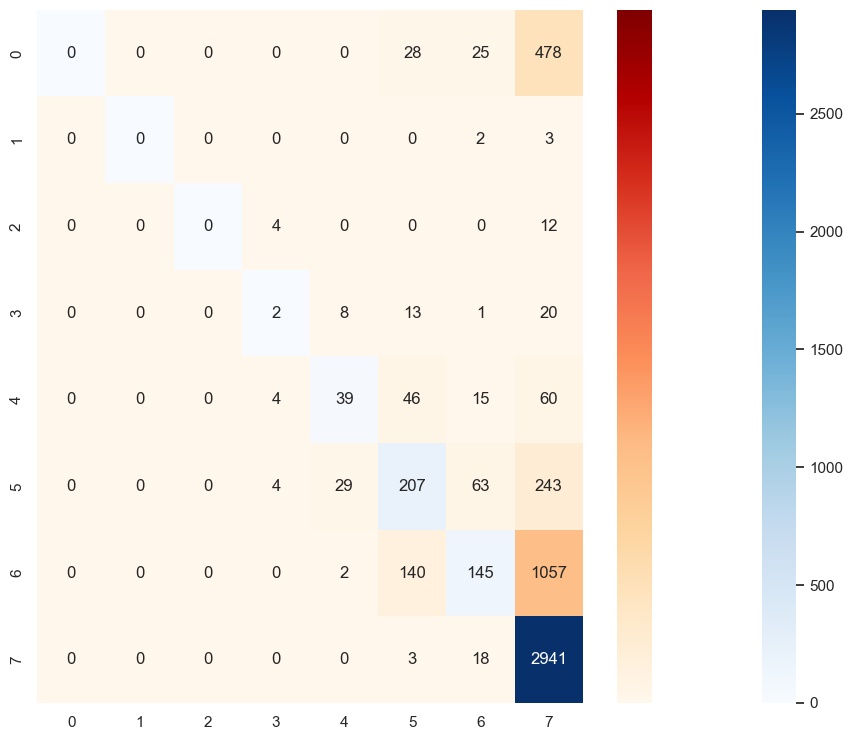

In [75]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [76]:
metrics.accuracy_score(y_test, predictions)

0.5940841054882395

# Logistic regression
<br />

In [77]:
model_log_reg = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg')
model_log_reg.fit(X_train, y_train)
predictions = model_log_reg.predict(X_test)


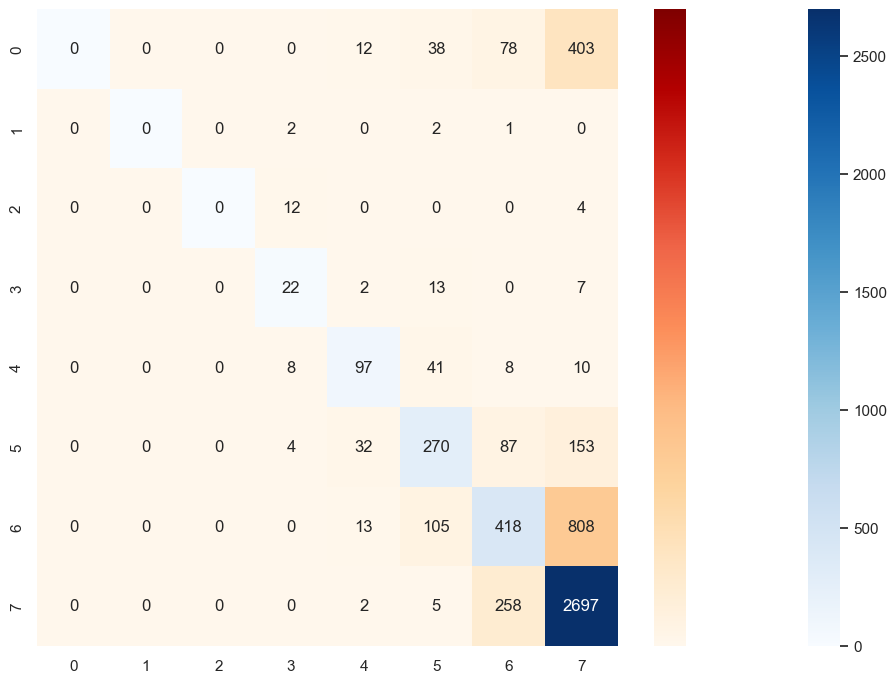

In [78]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')
sns.set(rc={'figure.figsize':(10,10)})

In [79]:
metrics.accuracy_score(y_test, predictions)

0.624376336421953

# SVM
<br/>

In [80]:
# svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
predictions = model_svm.predict(X_test)


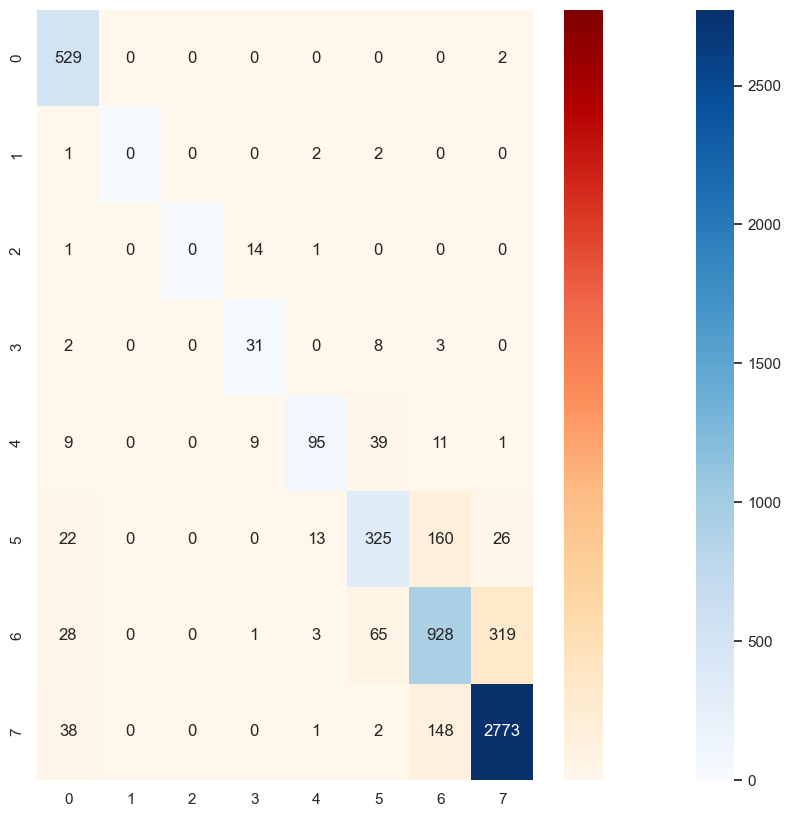

In [81]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')
sns.set(rc={'figure.figsize':(10,10)})

In [82]:
metrics.accuracy_score(y_test, predictions)

0.8341054882394868

# KNN

In [83]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)
y_test

array([5, 6, 6, ..., 4, 5, 5], dtype=int64)

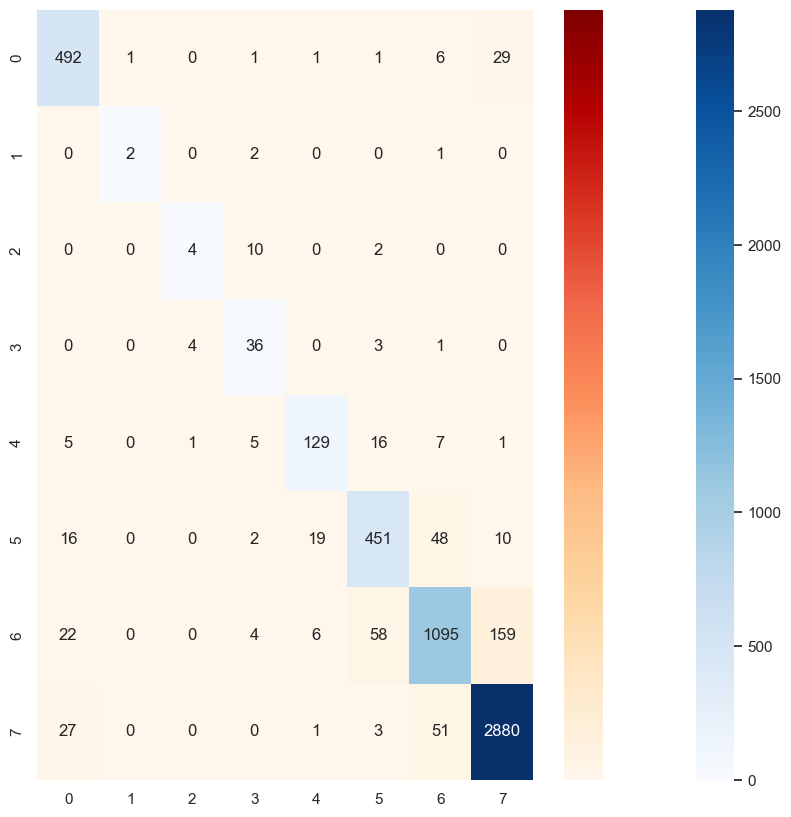

In [84]:
cm = confusion_matrix(y_test, predictions)

vmin = np.min(cm)
vmax = np.max(cm)
off_diag_mask = np.eye(*cm.shape, dtype=bool)

fig = plt.figure()
sns.heatmap(cm, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, fmt='g')
sns.heatmap(cm, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), fmt='g')
sns.set(rc={'figure.figsize':(10,10)})

In [85]:
metrics.accuracy_score(y_test, predictions)

0.9068068424803991

Conclusion: this problem setup made disjunct classes, so some classes that are missed for one (eg. mate in 6 is classified as mate in 5) are classified as miss. This way of reducing classes just for metrics is not appropriate, because most misses are very close to actual class. The main advantage of this approach is that models are easier to train. Without class reduction, logistic regression could not even converge.